In [1]:
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD,Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

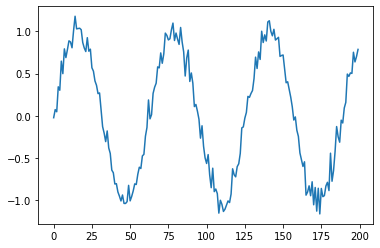

In [12]:
series=np.sin(0.1*np.arange(200))+np.random.randn(200)*0.1

plt.plot(series)
plt.show()

In [13]:
T=10
X=[]
Y=[]
for t in range(len(series)-T):
  x=series[t:t+T]
  X.append(x)
  y=series[t+T]
  Y.append(y)

X=np.array(X).reshape(-1,T)
Y=np.array(Y)
N=len(X)
print(X.shape,Y.shape)

(190, 10) (190,)


In [14]:
i=Input(shape=(T,))
x=Dense(1)(i)
model=Model(i,x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.1)
)

r=model.fit(X[:N//2],Y[:N//2],epochs=80,validation_data=(X[-N//2:],Y[-N//2:]))

Epoch 1/80


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 0s 63ms/step - loss: 0.5326 - val_loss: 0.4403
Epoch 2/80
3/3 [==============================] - 0s 16ms/step - loss: 0.3234 - val_loss: 0.1645
Epoch 3/80
3/3 [==============================] - 0s 16ms/step - loss: 0.1547 - val_loss: 0.1405
Epoch 4/80
3/3 [==============================] - 0s 15ms/step - loss: 0.1083 - val_loss: 0.0407
Epoch 5/80
3/3 [==============================] - 0s 31ms/step - loss: 0.0668 - val_loss: 0.0923
Epoch 6/80
3/3 [==============================] - 0s 16ms/step - loss: 0.0839 - val_loss: 0.0647
Epoch 7/80
3/3 [==============================] - 0s 17ms/step - loss: 0.0677 - val_loss: 0.1224
Epoch 8/80
3/3 [==============================] - 0s 17ms/step - loss: 0.0733 - val_loss: 0.0516
Epoch 9/80
3/3 [==============================] - 0s 23ms/step - loss: 0.0440 - val_loss: 0.0634
Epoch 10/80
3/3 [==============================] - 0s 15ms/step - loss: 0.0477 - val_loss: 0.0393
Epoch 11/80
3/3 [=======================

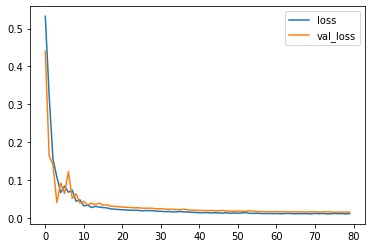

In [15]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

In [16]:

validation_target= Y[-N//2:]
validation_predictions=[]

last_x=X[-N//2]

while(len(validation_predictions)<len(validation_target)):
  p=model.predict(last_x.reshape(1,-1))[0,0]
  validation_predictions.append(p)

  last_x=np.roll(last_x,-1)
  last_x[-1]=p

1/1 [==============================] - 0s 28ms/step


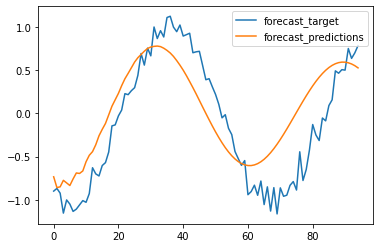

In [17]:
plt.plot(validation_target,label='forecast_target')
plt.plot(validation_predictions,label='forecast_predictions')
plt.legend()